<a href="https://colab.research.google.com/github/Karthikladappan/AIML/blob/master/ComputerVision_R8_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Get the file
downloaded = drive.CreateFile({'id': '19hwWU_abSrXggPM4Oq2cf8U2f0XHFxgR'}) #replace the my_id with id of file you want to access
downloaded.GetContentFile('labels.csv.zip')
downloaded = drive.CreateFile({'id': '1svCUiL9O20hAzJLWM-I00LPAVfjinUMq'}) #replace the my_id with id of file you want to access
downloaded.GetContentFile('sample_submission.csv.zip')
downloaded = drive.CreateFile({'id': '1KQnxXVso_uAru8CUC8cdagD5XiawgxjJ'}) #replace the my_id with id of file you want to access
downloaded.GetContentFile('test.zip')
downloaded = drive.CreateFile({'id': '13hbMKb7qxOS7rZlmQMity9OxL8N_siNz'}) #replace the my_id with id of file you want to access
downloaded.GetContentFile('train.zip')

Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Colab Notebooks/AIML_Project/Dog_breed/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile('train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile('test.zip', 'r') as p:
  p.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile('sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile('labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd

In [0]:
labels= pd.read_csv('labels.csv')

In [12]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [13]:
labels.shape

(10222, 2)

In [0]:
sample_submission= pd.read_csv('sample_submission.csv')

### Print the count of each category of Dogs given in the dataset



In [15]:
labels.columns

Index(['id', 'breed'], dtype='object')

In [16]:
labels.groupby('breed').count().sort_values(by= 'id', ascending=[False])

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
...,...
golden_retriever,67
brabancon_griffon,67
komondor,67


### Get one-hot encodings of labels

In [0]:

lab=pd.get_dummies(labels['breed'])

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
from tqdm import tqdm
import cv2
x_feature= []
y_feature=[]
img_rows=128
img_cols=128
num_channel=1


In [19]:
for f, img in tqdm(labels.values):
  train_img= cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize= cv2.resize(train_img, (img_rows, img_cols))
  x_feature.append(train_img_resize)
  y_feature.append(img)

100%|██████████| 10222/10222 [00:26<00:00, 392.37it/s]


In [0]:
import matplotlib.pyplot as plt

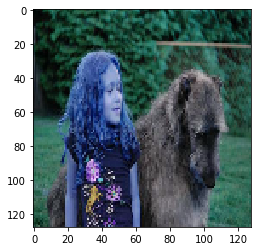

In [21]:
plt.imshow(x_feature[9])

In [22]:
y_feature[9]

'scottish_deerhound'

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [23]:
import numpy as np
np.shape(x_feature)

(10222, 128, 128, 3)

In [0]:
x_feature = np.array(x_feature)

In [0]:
x_feature=x_feature.astype('float32')

In [0]:
x_feature= x_feature/255

In [27]:
x_feature.shape

(10222, 128, 128, 3)

In [28]:
x_feature[5]

array([[[0.5372549 , 0.5019608 , 0.5294118 ],
        [0.59607846, 0.5647059 , 0.5921569 ],
        [0.6431373 , 0.6117647 , 0.6392157 ],
        ...,
        [0.2901961 , 0.27058825, 0.29411766],
        [0.4392157 , 0.36078432, 0.40784314],
        [0.4627451 , 0.45490196, 0.4862745 ]],

       [[0.65882355, 0.6117647 , 0.63529414],
        [0.6784314 , 0.6313726 , 0.654902  ],
        [0.6666667 , 0.61960787, 0.6431373 ],
        ...,
        [0.5411765 , 0.54509807, 0.54509807],
        [0.5294118 , 0.4862745 , 0.5058824 ],
        [0.5058824 , 0.47843137, 0.49019608]],

       [[0.4627451 , 0.4       , 0.43137255],
        [0.6039216 , 0.5411765 , 0.5686275 ],
        [0.68235296, 0.61960787, 0.64705884],
        ...,
        [0.5568628 , 0.50980395, 0.50980395],
        [0.54509807, 0.4862745 , 0.49411765],
        [0.4627451 , 0.41568628, 0.41568628]],

       ...,

       [[0.5647059 , 0.54901963, 0.6       ],
        [0.6156863 , 0.5882353 , 0.6431373 ],
        [0.6666667 , 0

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img= pd.read_csv('sample_submission.csv')

In [30]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
#y_train= tf.keras.utils.to_categorical(
 #   y_feature,
 #   num_classes=None,
 #  dtype='float32'
#)
y_feature= pd.get_dummies(y_feature)

In [0]:
y_feature=np.array(y_feature)

In [33]:
y_feature[5]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [34]:
from sklearn.model_selection import train_test_split
x_train2, x_val, y_train2, y_val = train_test_split(x_feature, y_feature, test_size=0.3, random_state=2)
print (len(x_train2))
print (len(x_val))

7155
3067


In [35]:
x_train2.shape

(7155, 128, 128, 3)

In [36]:
x_val.shape

(3067, 128, 128, 3)

In [37]:
np.shape(y_train2)

(7155, 120)

In [38]:
np.shape(y_val)

(3067, 120)

Run the below code to load the test image files in x_test_feature

In [0]:
df_test = pd.read_csv('sample_submission.csv')
n_test = len(df_test)

In [40]:
sample_submission.id.count()

10357

In [41]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(sample_submission.id): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:25<00:00, 413.51it/s]


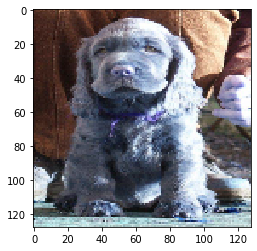

In [42]:
plt.imshow(x_test_feature[9])

Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature = np.array(x_test_feature)
x_test_feature=x_test_feature.astype('float32')

In [0]:
x_test_feature= x_test_feature/255

In [45]:
x_test_feature.shape

(10357, 128, 128, 3)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [0]:
input_shape = (img_rows, img_cols, 3)

In [48]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(5, 3),
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Conv2D(32,kernel_size=(8, 8),
                 activation='relu',
                 input_shape=input_shape,name='conv_2'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(256, activation='relu',name='dense_1'))
model.add(Dense(120, activation='softmax',name='dense_2'))


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 124, 126, 32)      1472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 32)        65568     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               295168    
_________________________________________________________________
dense_2 (Dense)              (None, 120)              

### Use batch_size = 128 and epochs = 10 and execute the model

In [50]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy


optimizer = Adam(lr=0.01)

model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [51]:
model.fit(x_train2, y_train2,
          batch_size=128,
          epochs=10,
          validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7155 samples, validate on 3067 samples
Epoch 1/10





7155/7155 [==============================] - 12s 2ms/step - loss: 4.9737 - acc: 0.0110 - val_loss: 4.7910 - val_acc: 0.0101
Epoch 2/10
7155/7155 [==============================] - 4s 573us/step - loss: 4.7777 - acc: 0.0120 - val_loss: 4.7963 - val_acc: 0.0101
Epoch 3/10
7155/7155 [==============================] - 4s 574us/step - loss: 4.7766 - acc: 0.0133 - val_loss: 4.7926 - val_acc: 0.0101
Epoch 4/10
7155/7155 [==============================] - 4s 572us/step - loss: 4.7752 - acc: 0.0133 - val_loss: 4.7932 - val_acc: 0.0101
Epoch 5/10
7155/7155 [==============================] - 4s 574us/step - loss: 4.7748 - acc: 0.0133 - val_loss: 4.7954 - val_acc: 0.0101
Epoch 6/10
7155/7155 [==============================] - 4s 572us/step - loss: 4.7747 - acc: 0.0127 - val_loss: 4.7956 - val_acc: 0.0101
Epoch 7/10
7155/7155 [=============

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images


In [0]:
datagen.fit(x_train2)

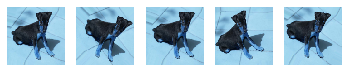

In [54]:
gen = datagen.flow(x_train2[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = datagen.flow(x_train2, y_train2,
                        batch_size=128)
val_generator = datagen.flow(x_val, y_val,
                        batch_size=128)


### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit_generator(train_generator,
                        samples_per_epoch=x_train2.shape[0],
                        nb_epoch=10,
                        validation_data=(x_val, y_val))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., steps_per_epoch=55, epochs=10)`
  """


Epoch 1/10
55/55 [==============================] - 26s 480ms/step - loss: 4.7717 - acc: 0.0132 - val_loss: 4.7972 - val_acc: 0.0101
Epoch 2/10
55/55 [==============================] - 26s 468ms/step - loss: 4.7715 - acc: 0.0135 - val_loss: 4.7973 - val_acc: 0.0101
Epoch 3/10
55/55 [==============================] - 25s 461ms/step - loss: 4.7705 - acc: 0.0129 - val_loss: 4.7974 - val_acc: 0.0101
Epoch 4/10
55/55 [==============================] - 25s 462ms/step - loss: 4.7710 - acc: 0.0135 - val_loss: 4.7974 - val_acc: 0.0101
Epoch 5/10
55/55 [==============================] - 26s 465ms/step - loss: 4.7712 - acc: 0.0137 - val_loss: 4.7974 - val_acc: 0.0101
Epoch 6/10
55/55 [==============================] - 25s 463ms/step - loss: 4.7704 - acc: 0.0129 - val_loss: 4.7975 - val_acc: 0.0101
Epoch 7/10
55/55 [==============================] - 26s 467ms/step - loss: 4.7724 - acc: 0.0126 - val_loss: 4.7976 - val_acc: 0.0101
Epoch 8/10
55/55 [==============================] - 25s 460ms/step - 

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Get the file
downloaded = drive.CreateFile({'id': '19hwWU_abSrXggPM4Oq2cf8U2f0XHFxgR'}) #replace the my_id with id of file you want to access
downloaded.GetContentFile('labels.csv.zip')

In [58]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', pooling='avg')

553467904/553467096 [==============================] - 5s 0us/step


Print the summary of the base_model

In [59]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [60]:
from tqdm import tqdm
import cv2
X_feature = []
Y_feature = []
targets_series = pd.Series(labels['breed'])
one_hot = pd.get_dummies(targets_series, sparse = True)
one_hot_labels = np.asarray(one_hot)



i = 0 # initialisation
for f, img in tqdm(labels.values): # f for format ,jpg
    train_img = cv2.imread('./train/{}.jpg'.format(f),1)
    label = one_hot_labels[i]
    train_img_resize = cv2.resize(train_img, (img_rows, img_cols)) 
    X_feature.append(train_img_resize)
    Y_feature.append(label)
    i += 1

100%|██████████| 10222/10222 [00:25<00:00, 400.01it/s]


In [69]:
model = keras.applications.VGG16(weights = "imagenet", include_top=False, input_shape = (128, 128, 3))

58892288/58889256 [==============================] - 1s 0us/step


### Make all the layers in the base_model (VGG16) to be non-trainable

In [70]:
# Freeze the layers which you don't want to train. In this we are freezing the first 5 layers.
for layer in model.layers:
    layer.trainable = False

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(1024, input_shape=(128,128,3), activation="relu")(x)
#x = Dropout(0.3)(x)
x = Dense(256, activation="relu")(x)
x = Dense(120, activation="softmax")(x)
predictions = Dense(120, activation="softmax")(x)

# creating the final model
 
model_final = keras.Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer ='Adam', metrics=["accuracy"])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [71]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image



X_arr = []

for id, label in tqdm(labels.values):
    X_arr.append(model.predict(preprocess_input(np.expand_dims(keras.preprocessing.image.img_to_array(image.load_img('./train/'+id+'.jpg', target_size=[128,128])), axis=0))))

100%|██████████| 10222/10222 [02:33<00:00, 66.62it/s]
